In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('C:\\Users\\HP\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1)

In [4]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [5]:
dataset.drop(dataset.columns[[0,1,2]], axis=1, inplace=True)

In [6]:
dataset

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


In [7]:
dataset.drop(dataset.columns[10], axis=1, inplace=True)

In [8]:
dataset

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [9]:
dataset.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
dtype: int64

In [10]:
#EDA
dataset.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.660151,-0.228035,-0.486947,0.748423,0.541489,0.532838,0.663871,0.542210,0.608367
RH,-0.660151,1.000000,0.245774,0.329163,-0.653153,-0.347080,-0.314271,-0.586410,-0.338233,-0.476067
Ws,-0.228035,0.245774,1.000000,0.349321,-0.211069,0.039394,0.099231,-0.039266,0.062212,0.029637
Rain,-0.486947,0.329163,0.349321,1.000000,-0.573476,-0.265371,-0.283652,-0.366425,-0.271951,-0.292914
FFMC,0.748423,-0.653153,-0.211069,-0.573476,1.000000,0.608512,0.575221,0.790086,0.600707,0.675553
DMC,0.541489,-0.347080,0.039394,-0.265371,0.608512,1.000000,0.962193,0.750098,0.995551,0.901759
DC,0.532838,-0.314271,0.099231,-0.283652,0.575221,0.962193,1.000000,0.717591,0.982554,0.869911
ISI,0.663871,-0.586410,-0.039266,-0.366425,0.790086,0.750098,0.717591,1.000000,0.746761,0.944062
BUI,0.542210,-0.338233,0.062212,-0.271951,0.600707,0.995551,0.982554,0.746761,1.000000,0.900417
FWI,0.608367,-0.476067,0.029637,-0.292914,0.675553,0.901759,0.869911,0.944062,0.900417,1.000000


In [11]:
#since DC and DMC are highly correlated droping one feature
dataset.drop(dataset.columns[5], axis = 1)

,Temperature,RH,Ws,Rain,FFMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...
117,31,54,11,0.0,82.0,16.3,2.5,6.2,1.7
118,31,66,11,0.0,85.7,24.9,4.0,9.0,4.1
119,32,47,14,0.7,77.5,8.8,1.8,6.8,0.9
120,26,80,16,1.8,47.4,7.7,0.3,3.0,0.1


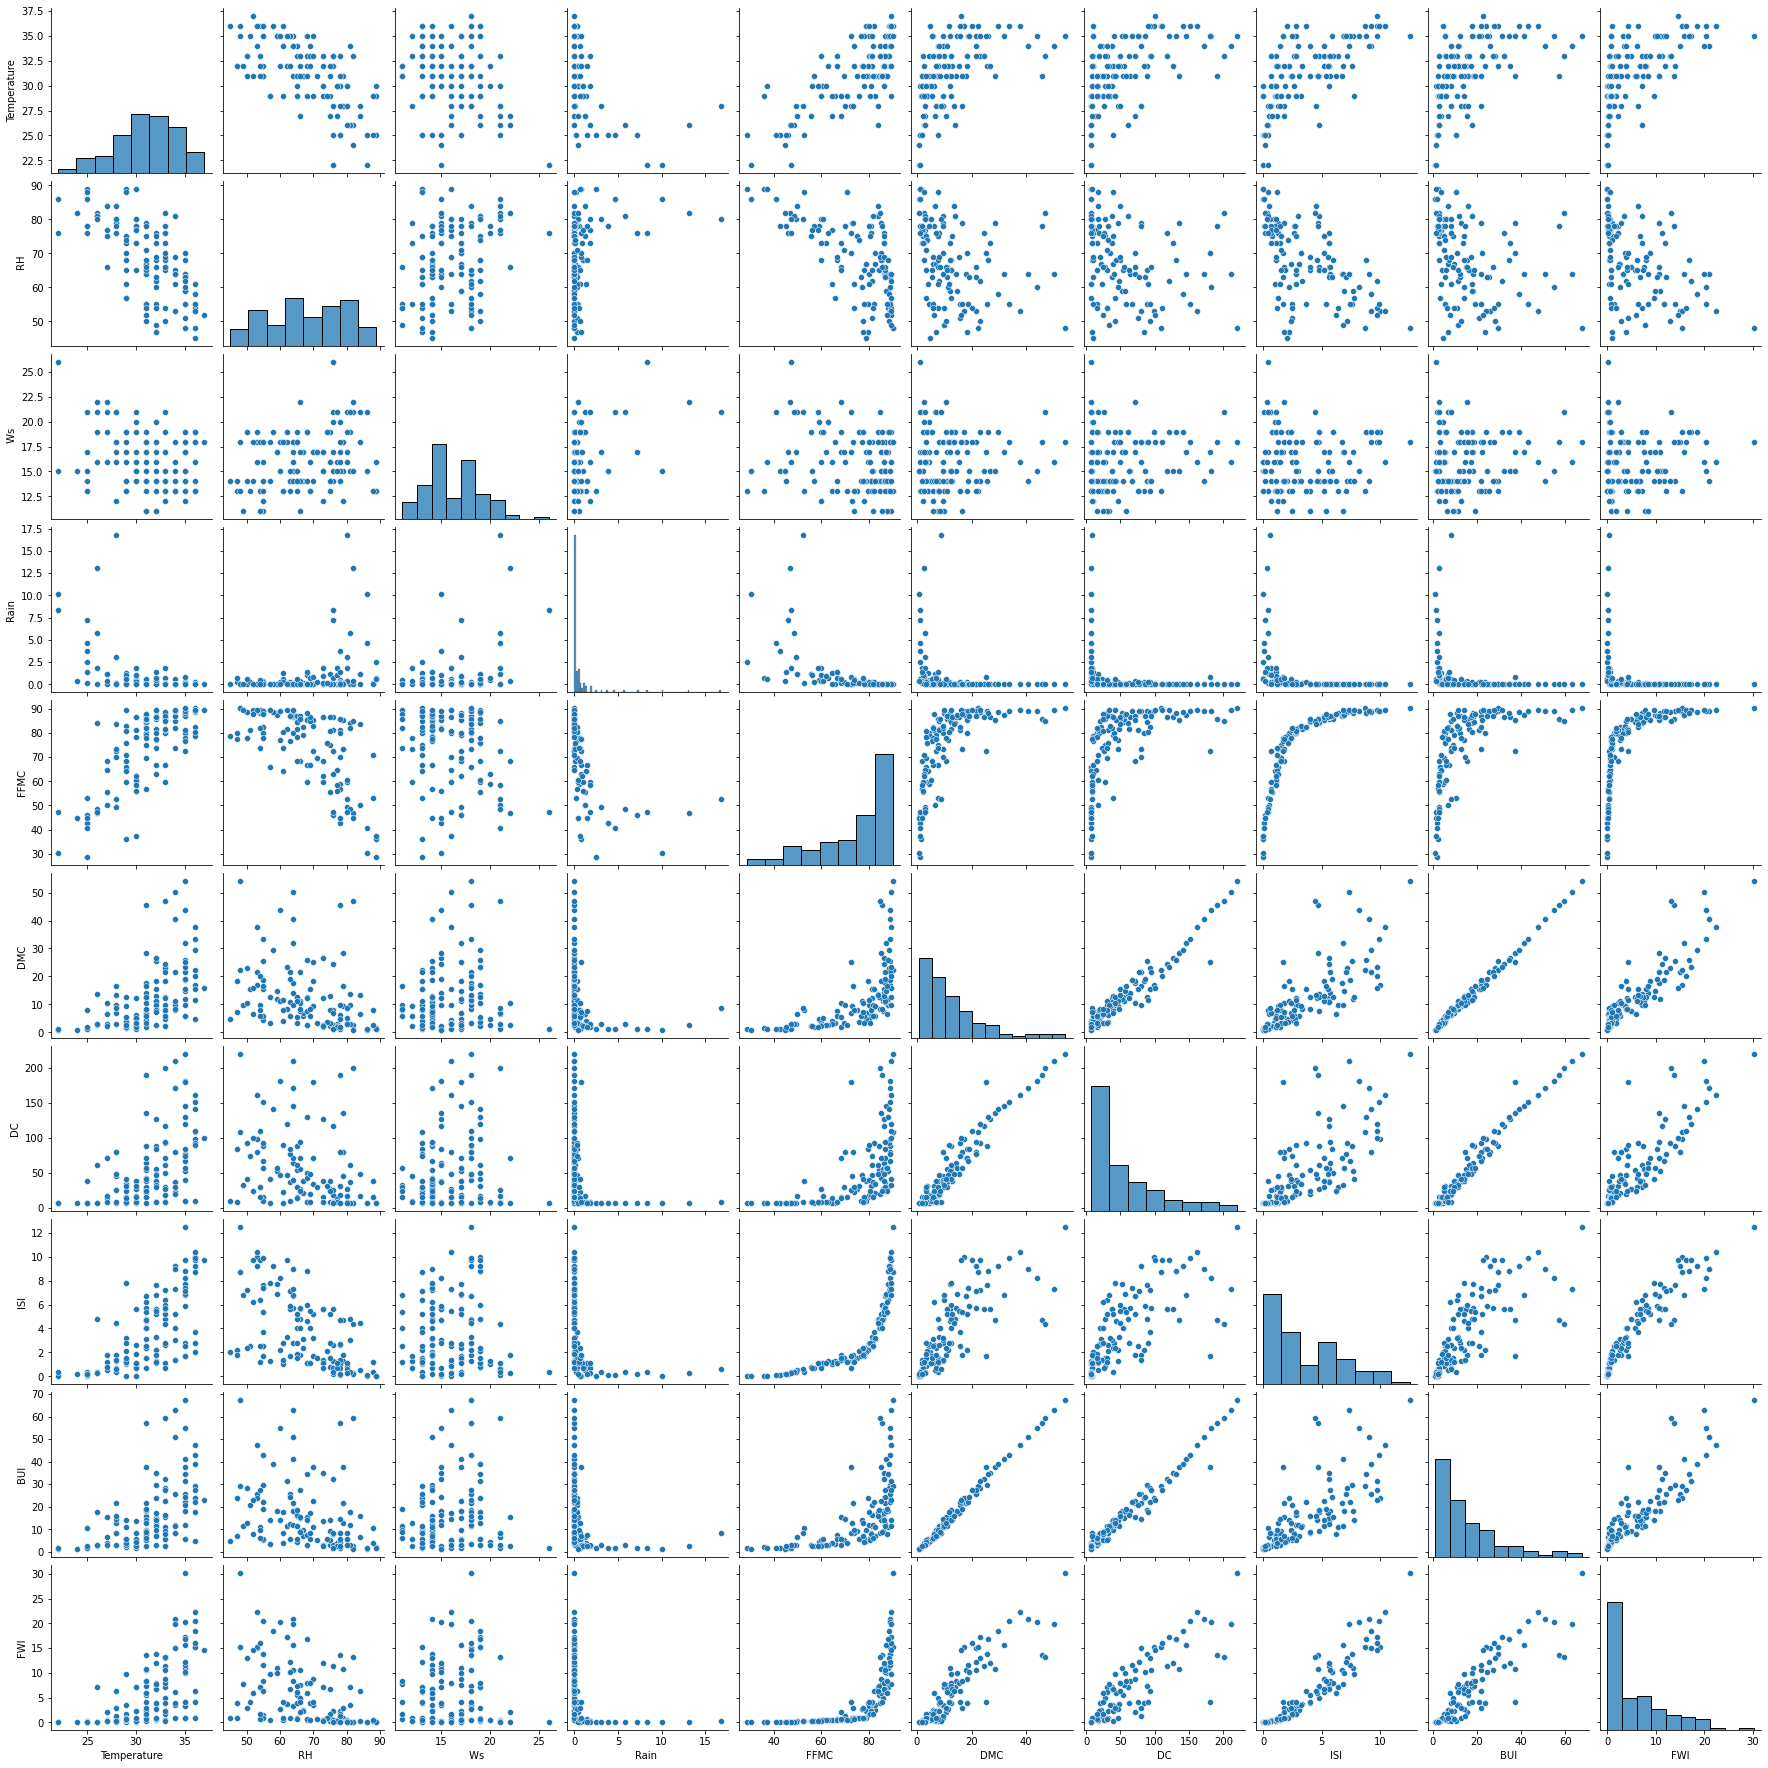

In [12]:
sns.pairplot(dataset)

<AxesSubplot:>

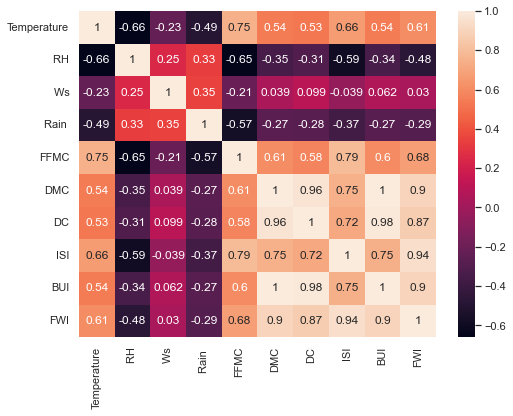

In [13]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(dataset.corr(), annot=True)

In [14]:
#Independent variable
x = dataset.iloc[:,2:]

In [15]:
x

,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...
117,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [16]:
#Dependent variable
y = dataset.iloc[:,0]

In [17]:
y

0      29
1      29
2      26
3      25
4      27
       ..
117    31
118    31
119    32
120    26
121    25
Name: Temperature, Length: 122, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=52)

In [19]:
x_train

,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
51,18,0.1,73.4,16.4,79.9,1.8,21.7,2.8
44,19,0.4,60.7,5.2,17.0,1.1,5.9,0.5
60,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7
88,16,0.0,89.4,50.2,210.4,7.3,62.9,19.9
83,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3
...,...,...,...,...,...,...,...,...
23,17,0.0,85.9,11.2,55.8,5.6,14.9,7.5
13,20,0.5,59.0,4.6,7.8,1.0,4.4,0.4
11,19,0.0,84.0,13.8,61.4,4.8,17.7,7.1
28,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9


In [20]:
x_test

,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
66,14,0.0,86.4,13.0,39.1,5.2,14.2,6.8
53,16,0.1,70.0,9.6,79.7,1.4,14.7,1.3
40,14,0.0,81.1,8.1,18.7,2.6,8.1,2.2
19,16,0.4,59.8,3.4,27.1,0.9,5.1,0.4
18,16,0.1,79.9,4.5,16.0,2.5,5.3,1.4
89,18,0.0,90.1,54.2,220.4,12.5,67.4,30.2
72,13,0.3,81.3,15.6,75.1,2.5,20.7,4.2
104,21,4.6,40.9,1.3,7.5,0.1,1.8,0.0
4,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
82,18,0.0,89.1,33.5,151.3,9.9,43.1,20.4


In [21]:
y_train

51     28
44     30
60     35
88     34
83     36
       ..
23     32
13     30
11     26
28     32
117    31
Name: Temperature, Length: 81, dtype: int64

In [22]:
y_test

66     32
53     28
40     33
19     30
18     31
89     35
72     35
104    25
4      27
82     36
41     31
85     35
21     31
2      26
121    25
109    32
62     35
67     32
24     31
77     37
75     36
50     33
27     32
58     32
8      25
1      29
52     27
55     36
31     27
47     31
73     35
36     35
96     29
105    22
107    30
70     35
14     28
81     36
95     29
68     32
29     33
Name: Temperature, dtype: int64

In [23]:
#standardizing / feature scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
scaler

StandardScaler()

In [25]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
x_train

array([[ 7.54829412e-01, -3.05226748e-01, -4.85963481e-02,
         4.04398094e-01,  5.57976047e-01, -5.96292820e-01,
         4.76259713e-01, -4.15231327e-01],
       [ 1.11876502e+00, -1.78872234e-01, -8.48453360e-01,
        -6.12425495e-01, -6.54267423e-01, -8.42899698e-01,
        -6.31751886e-01, -8.10517970e-01],
       [ 3.90893803e-01, -3.47344919e-01,  8.20539618e-01,
         1.81160931e+00,  1.82610992e+00,  1.16518488e+00,
         1.84374238e+00,  1.80181115e+00],
       [ 2.69581933e-02, -3.47344919e-01,  9.59097526e-01,
         3.47302643e+00,  3.07304398e+00,  1.34133265e+00,
         3.36550515e+00,  2.52363894e+00],
       [ 2.69581933e-02, -3.47344919e-01,  9.65395613e-01,
         2.32909989e+00,  2.13061623e+00,  2.43344882e+00,
         2.28554448e+00,  2.93611196e+00],
       [ 1.11876502e+00, -3.47344919e-01,  7.19770231e-01,
         5.03255943e-02, -2.21277440e-02,  8.83348445e-01,
         3.44576197e-02,  4.78460215e-01],
       [-3.36977416e-01, -3.473449

In [27]:
x_test

array([[-0.70091303, -0.34734492,  0.77015492,  0.0957195 , -0.22834404,
         0.60151201, -0.04969516,  0.27222371],
       [ 0.02695819, -0.30522675, -0.2627313 , -0.21295909,  0.55412154,
        -0.73721104, -0.0146315 , -0.67302696],
       [-0.70091303, -0.34734492,  0.43635633, -0.34914082, -0.62150409,
        -0.31445639, -0.47747179, -0.51834958],
       [ 0.02695819, -0.17887223, -0.90513614, -0.77584357, -0.45961466,
        -0.91335881, -0.68785374, -0.82770435],
       [ 0.02695819, -0.30522675,  0.36077929, -0.67597697, -0.67353997,
        -0.34968594, -0.67382828, -0.65584059],
       [ 0.75482941, -0.34734492,  1.00318413,  3.83617771,  3.26576949,
         3.17326945,  3.68107807,  4.29383565],
       [-1.06484864, -0.2209904 ,  0.4489525 ,  0.33176784,  0.4654678 ,
        -0.34968594,  0.4061324 , -0.17462207],
       [ 1.84663624,  1.59009096, -2.09547453, -0.966498  , -0.83735666,
        -1.19519524, -0.91927388, -0.89644985],
       [ 0.02695819, -0.34734492

In [28]:
x_train.shape

(81, 8)

In [29]:
x_test.shape

(41, 8)

In [30]:
#Model Training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [31]:
print(regression.coef_)

[-0.26472403 -0.25464308  2.09287648 -0.88547164  1.32233054 -1.68240393
 -1.28716656  2.59830818]


In [32]:
print(regression.intercept_)

31.17283950617284


In [33]:
#prediction for test data
prediction = regression.predict(x_test)

In [34]:
prediction

array([32.43127378, 31.12525227, 31.64419379, 29.66752825, 31.45797561,
       35.16243433, 32.38416864, 26.50686657, 30.04805126, 34.29194769,
       31.15654443, 34.39895708, 31.7181006 , 26.0543337 , 27.94788495,
       32.93541897, 31.49149054, 32.38015767, 32.95552587, 33.78749614,
       33.08177065, 32.54692623, 33.39016838, 33.66287962, 28.76918676,
       29.96218521, 30.04831624, 33.58053759, 28.57577769, 32.47213041,
       33.28665934, 31.48372703, 31.85384587, 26.37333123, 31.70796837,
       33.16611208, 27.79282239, 34.09320116, 30.51388481, 31.03748232,
       33.57294025])

Text(0, 0.5, 'predicted data')

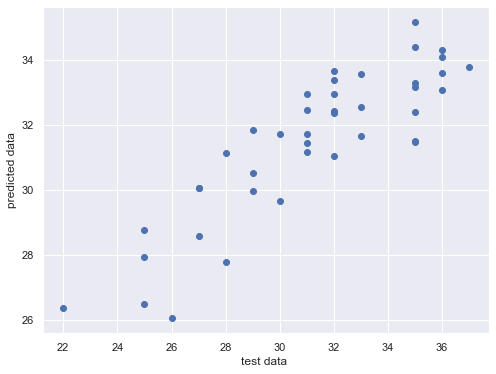

In [35]:
#graph
plt.scatter(y_test, prediction)
plt.xlabel('test data ')
plt.ylabel('predicted data')

In [36]:
residual = y_test - prediction

In [37]:
residual

66    -0.431274
53    -3.125252
40     1.355806
19     0.332472
18    -0.457976
89    -0.162434
72     2.615831
104   -1.506867
4     -3.048051
82     1.708052
41    -0.156544
85     0.601043
21    -0.718101
2     -0.054334
121   -2.947885
109   -0.935419
62     3.508509
67    -0.380158
24    -1.955526
77     3.212504
75     2.918229
50     0.453074
27    -1.390168
58    -1.662880
8     -3.769187
1     -0.962185
52    -3.048316
55     2.419462
31    -1.575778
47    -1.472130
73     1.713341
36     3.516273
96    -2.853846
105   -4.373331
107   -1.707968
70     1.833888
14     0.207178
81     1.906799
95    -1.513885
68     0.962518
29    -0.572940
Name: Temperature, dtype: float64

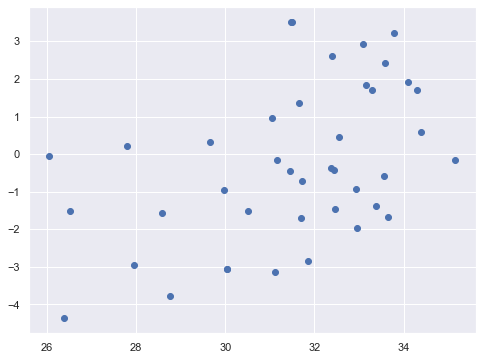

In [38]:
#uniformity
plt.scatter(prediction, residual)

In [39]:
## Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(np.sqrt(mean_squared_error(y_test,prediction)))

4.26709592717344
1.7084735110793905
2.0656950227885624


In [40]:
from sklearn.metrics import r2_score
score = r2_score(y_test,prediction)
print(score)

0.6867143495117682


# Ridge Regression

In [43]:
#Ridge Regression
from sklearn.linear_model import Ridge 
ridge = Ridge()

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=52)

In [61]:
ridge.fit(x_train,y_train)

Ridge()

In [62]:
rid_pred = ridge.predict(x_test)

In [63]:
rid_pred

array([32.44259615, 31.14607082, 31.63317018, 29.65765718, 31.45233362,
       35.0875415 , 32.37564634, 26.49652008, 30.03107008, 34.26007085,
       31.15485745, 34.34829267, 31.6964436 , 26.01611855, 27.94308508,
       32.99900529, 31.46442777, 32.38232415, 32.95813052, 33.83086686,
       33.06551272, 32.53322271, 33.38123432, 33.63352046, 28.81799071,
       29.93826055, 30.08080551, 33.62731005, 28.56249752, 32.47519225,
       33.27016611, 31.47388478, 31.84644707, 26.33707497, 31.67751385,
       33.18164244, 27.78500047, 34.06084128, 30.48198517, 31.04074953,
       33.56379796])

In [64]:
from sklearn.metrics import r2_score

In [65]:
score1 = r2_score(y_test,rid_pred)
print(score1)

0.6865339020743289


# Lasso Rigression

In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=52)

In [68]:
lasso_pred = lasso.predict(x_test)
print(lasso_pred)

[32.49161382 30.93550413 31.70038307 29.2980122  31.53774237 34.48100118
 32.20876559 26.93361959 29.76794611 33.77043093 31.08072212 34.0052517
 31.64694306 27.65049272 27.40995619 32.78854146 31.26538968 32.58494974
 32.73893439 33.35841124 32.48623609 32.65413539 33.23023225 33.27095586
 28.59701466 29.66470178 30.65412486 33.32872931 28.65996006 32.40984172
 32.95700854 31.75924645 31.71111919 27.68448643 31.32603842 33.02205569
 27.92028651 33.62460183 30.19909572 31.47909791 33.22074852]


In [69]:
from sklearn.metrics import r2_score
score2 = r2_score(y_test,lasso_pred)
print(score2)

0.6444938702632036
